ALP Data Mining ISB'21

Name : Steven Ongkowidjojo
NIM  : 0706022110035

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
# Load the data
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
# Check missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

<function matplotlib.pyplot.show(close=None, block=None)>

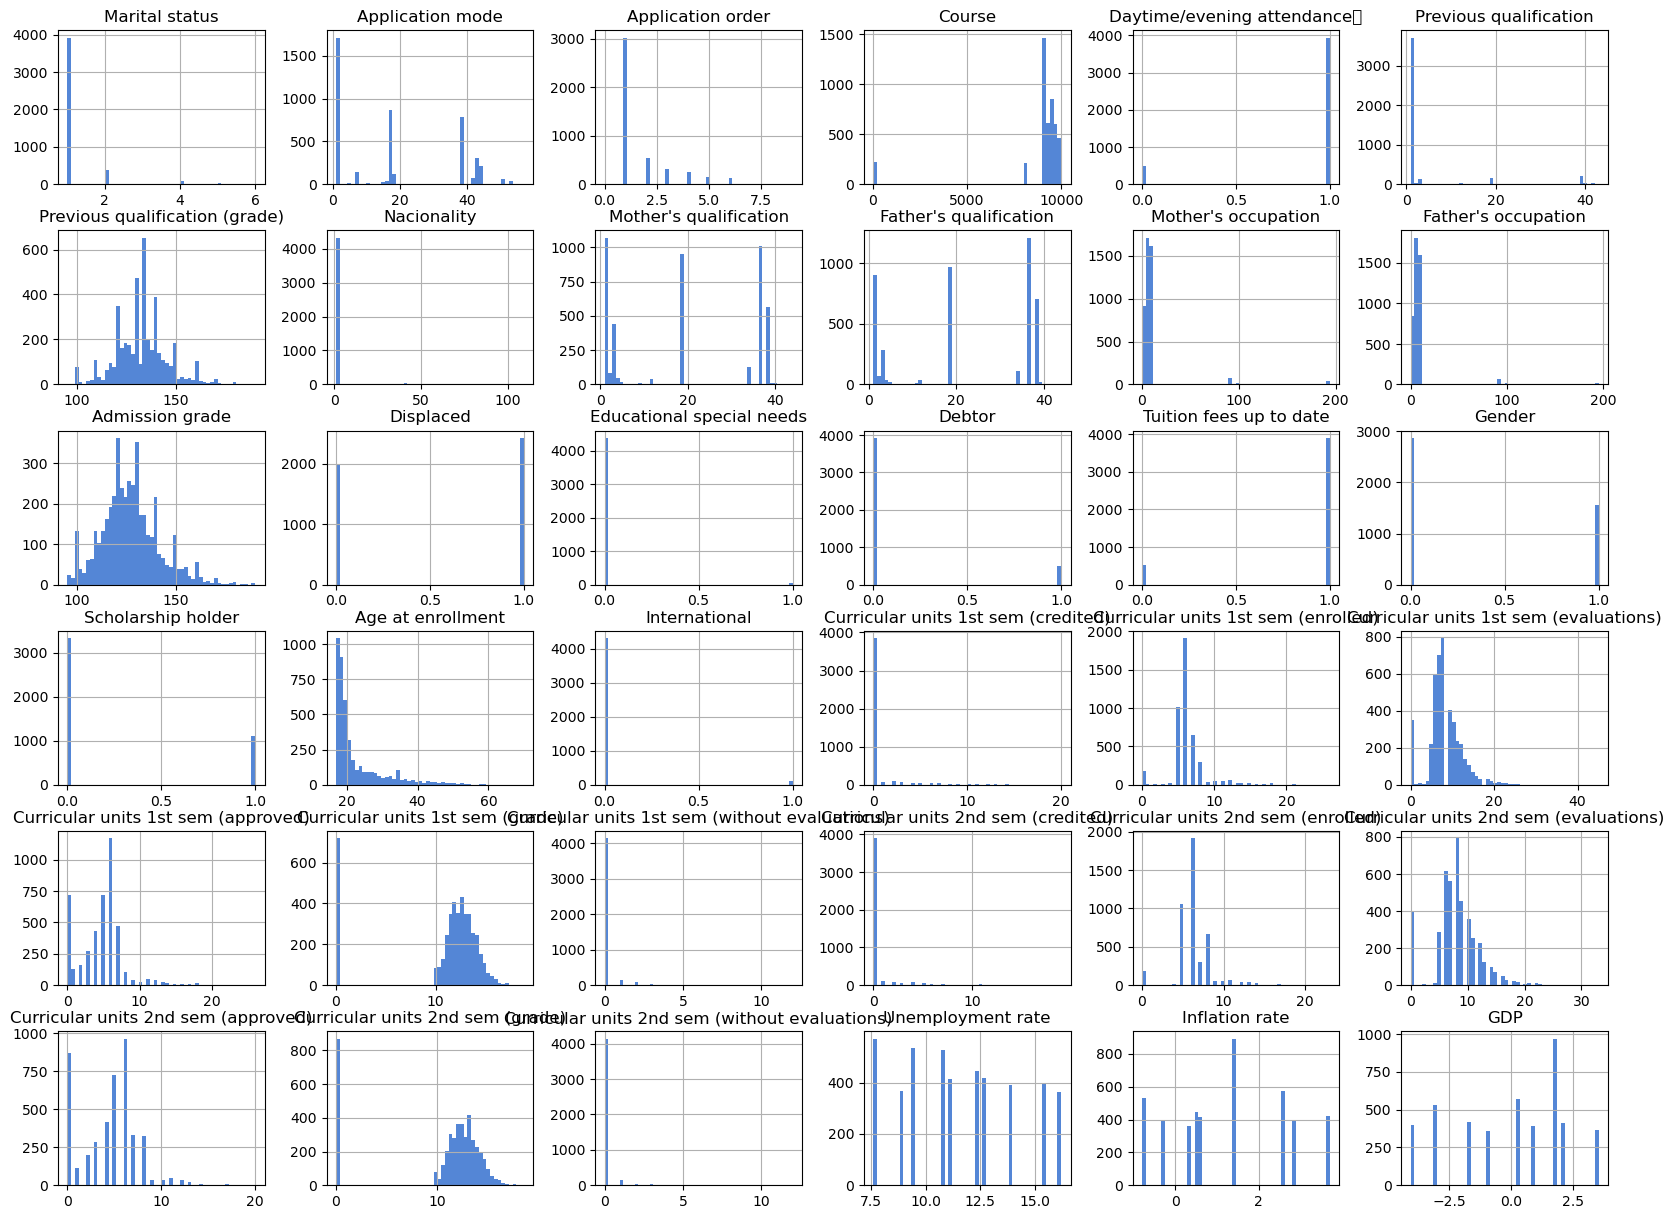

In [6]:
df[df.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

From the above figure, we can gain a satisfactory understanding of the numerical features, including their appearance, prevalent values across a substantial number of houses, and their distribution. Detailed discussions of individual features will be omitted in this context. Exploring the correlation among different features would also be beneficial for a comprehensive analysis.

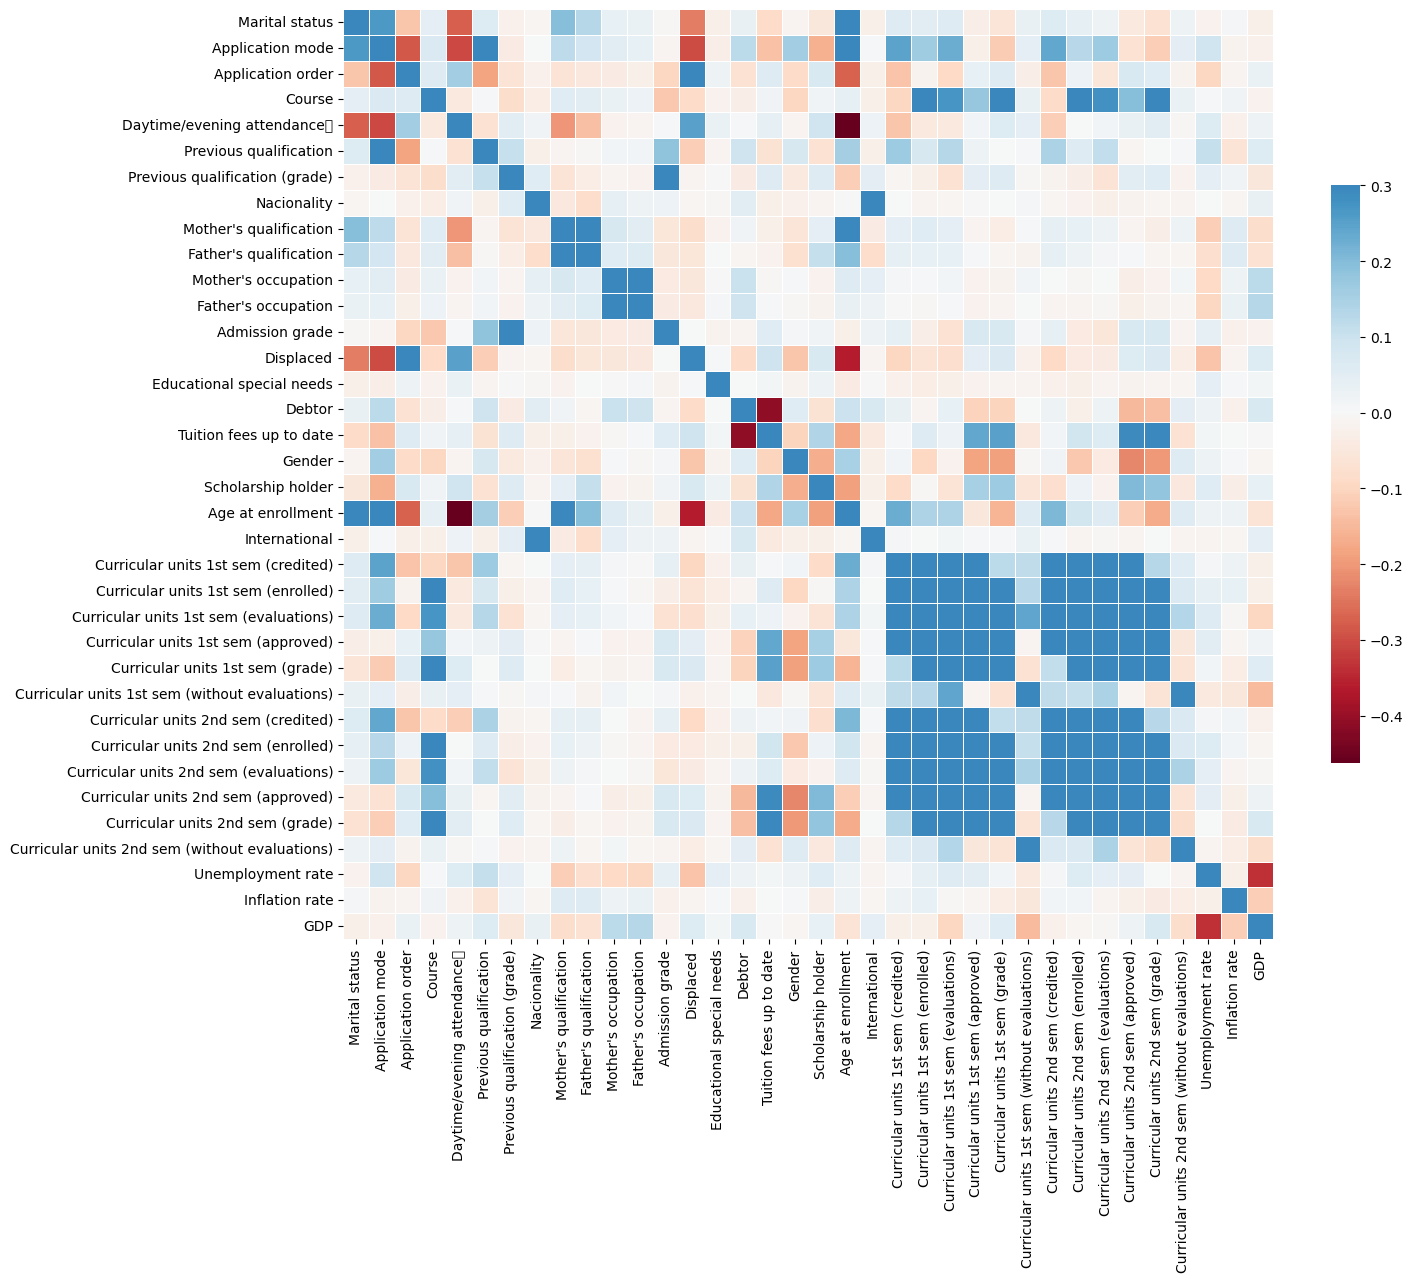

In [7]:
# Plotting correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=False, cmap='RdBu',vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the correlation matrix, it is evident that the majority of features exhibit robust and positive correlations with one another. The intensity of the orange-ish color indicates the strength of the positive correlation, while a deep blue color signifies a strong negative correlation. There are only a limited number of features that display negative correlations. Additionally, a small subset of features demonstrates weak positive or negative correlations.

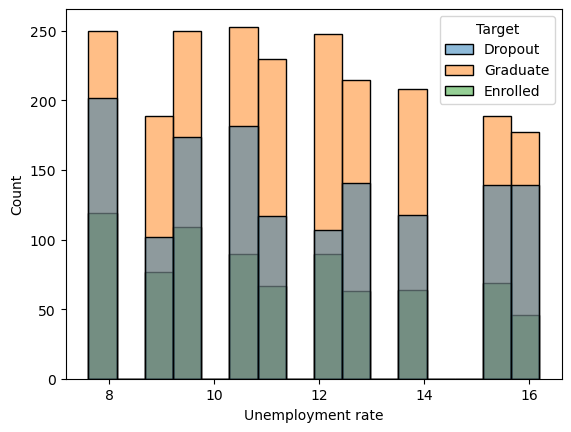

In [8]:
sns.histplot(x='Unemployment rate',data=df,hue='Target')
plt.show()

It's intriguing to discover that there is an inverse relationship between unemployment rates and the likelihood of students dropping out. This observation aligns with logic, as lower unemployment rates signify a heightened demand for labor, increasing the probability of job seekers securing employment without necessarily completing a degree. In contrast, during periods of high unemployment, individuals in the job market are likely to face more competition, motivating them to pursue higher education for a competitive edge in securing employment opportunities.

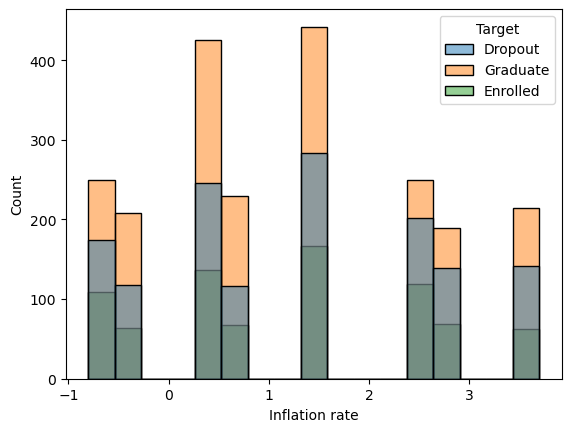

In [9]:
sns.histplot(x='Inflation rate',data=df,hue='Target')
plt.show()

In [10]:
lEncoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['Target'] = lEncoder.fit_transform(df_encoded['Target'])
df_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [11]:
standardScaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled.iloc[:, :] = standardScaler.fit_transform(df_scaled)
df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.925392
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.925392
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.925392


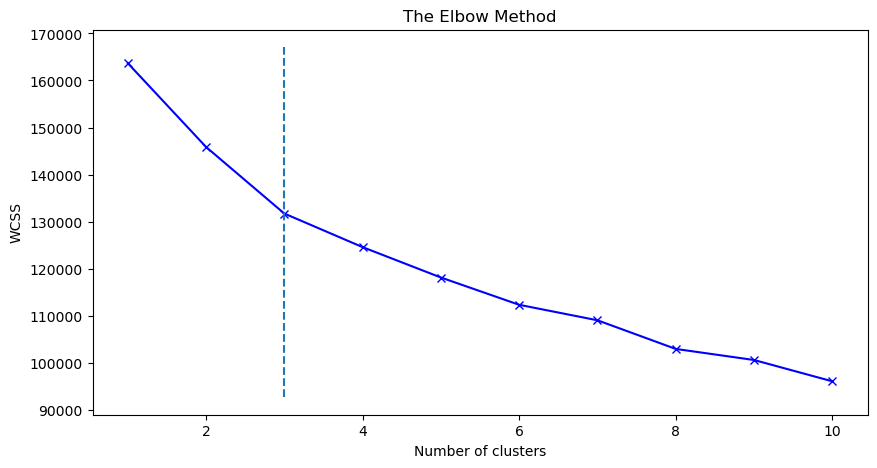

In [12]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    WCSS.append(kmeans.inertia_)

kneedElbow = KneeLocator(range(1,11), WCSS, curve='convex', direction='decreasing')
ePoint = kneedElbow.elbow

plt.figure(figsize=(10,5))
plt.plot(range(1,11), WCSS, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.vlines(ePoint, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

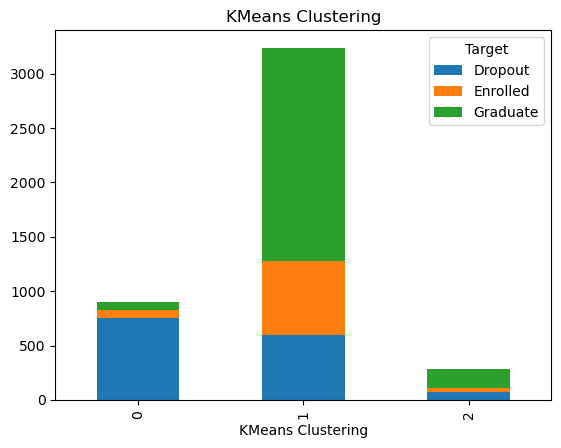

In [14]:
k_means = KMeans(n_clusters=ePoint, init='random', random_state=42, n_init='auto')
k_means.fit(df_scaled)
df['KMeans Clustering'] = k_means.labels_
df.groupby(['KMeans Clustering', 'Target']).size().unstack().plot(kind='bar', stacked=True)
plt.title('KMeans Clustering')
plt.show()

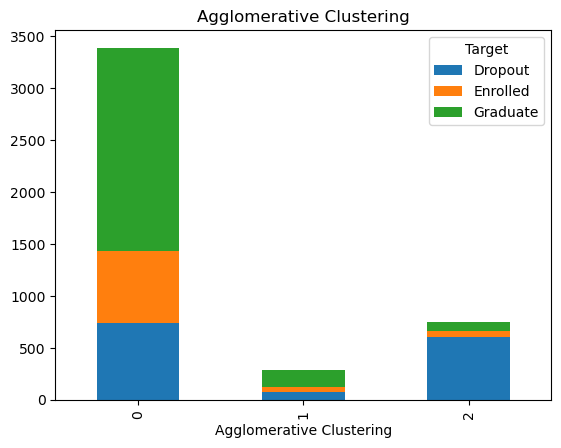

In [15]:
aggloClustering = AgglomerativeClustering(n_clusters=ePoint, linkage='ward', metric='euclidean')
aggloClustering.fit(df_scaled)
df['Agglomerative Clustering'] = aggloClustering.labels_
df.groupby(['Agglomerative Clustering', 'Target']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Agglomerative Clustering')
plt.show()

In [17]:
# Group by KMeans Clustering
df.groupby(['KMeans Clustering']).agg(count=('KMeans Clustering', 'count'),
                                      marital_status=('Marital status', pd.Series.mode),
                                      course=('Course', 'mean'),
                                      admission_grade=('Admission grade', 'mean'),
                                      gender=('Gender', pd.Series.mode),
                                      age=('Age at enrollment', 'mean'),
                                      scholarship_holder=('Scholarship holder', pd.Series.mode),
                                      international_student=('International', pd.Series.mode),
                                      unemployment_rate=('Unemployment rate', 'mean'),
                                      inflation_rate=('Inflation rate', 'mean'),
                                      gpd=('GDP', 'mean'))

,count,marital_status,course,admission_grade,gender,age,scholarship_holder,international_student,unemployment_rate,inflation_rate,gpd
KMeans Clustering,,,,,,,,,,,
0,904,1,7435.560841,126.423341,1,26.220133,0,0,11.590929,1.323451,-0.252699
1,3239,1,9328.747453,126.936122,0,21.966348,0,0,11.586724,1.187311,0.071550
2,281,1,7986.572954,129.246975,0,28.729537,0,0,11.249110,1.390391,0.019217


In [18]:
# Group by Agglomerative Clustering
df.groupby(['Agglomerative Clustering']).agg(count=('KMeans Clustering', 'count'),
                                      marital_status=('Marital status', pd.Series.mode),
                                      course=('Course', 'mean'),
                                      admission_grade=('Admission grade', 'mean'),
                                      gender=('Gender', pd.Series.mode),
                                      age=('Age at enrollment', 'mean'),
                                      scholarship_holder=('Scholarship holder', pd.Series.mode),
                                      international_student=('International', pd.Series.mode),
                                      unemployment_rate=('Unemployment rate', 'mean'),
                                      inflation_rate=('Inflation rate', 'mean'),
                                      gpd=('GDP', 'mean'))

,count,marital_status,course,admission_grade,gender,age,scholarship_holder,international_student,unemployment_rate,inflation_rate,gpd
Agglomerative Clustering,,,,,,,,,,,
0,3390,1,9303.646903,126.855929,0,22.343068,0,0,11.518909,1.196136,0.089484
1,287,1,8001.041812,128.520209,0,28.850174,0,0,11.493380,1.466551,-0.215157
2,747,1,7156.793842,126.940161,1,25.303882,0,0,11.808434,1.281124,-0.311767


In [19]:
target_mapping = {'Dropout' : 0, 'Enrolled' : 1, 'Graduate' : 2}
df['Target'] = df['Target'].map(target_mapping)
x = df.drop(['Target', 'Agglomerative Clustering', 'KMeans Clustering'], axis=1).values
y = df['Target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
tree_output = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=5, min_samples_split=5)
tree_output.fit(x_train, y_train)
y_pred = tree_output.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy score:  0.7209039548022599
Confusion matrix: 
 [[233   0  83]
 [ 57   0  94]
 [ 13   0 405]]


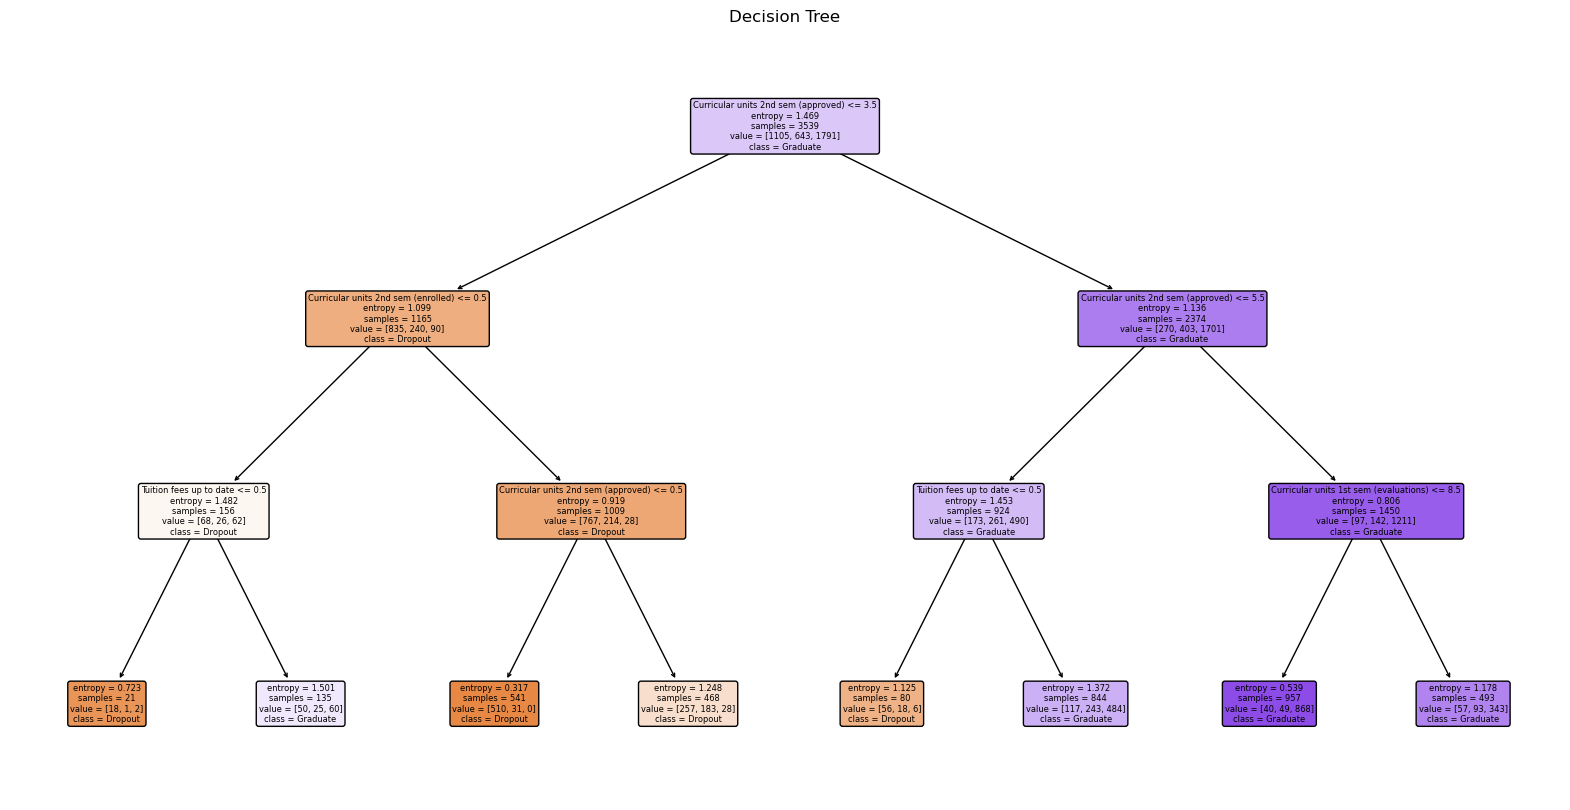

In [26]:
plt.figure(figsize=(20,10))
plot_tree(tree_output, filled=True, rounded=True, feature_names=list(df.drop(['Target', 'Agglomerative Clustering', 'KMeans Clustering'], axis=1).columns), class_names=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Decision Tree')
plt.show()

In [24]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy score:  0.7694915254237288
Confusion matrix: 
 [[236  35  45]
 [ 32  65  54]
 [ 13  25 380]]


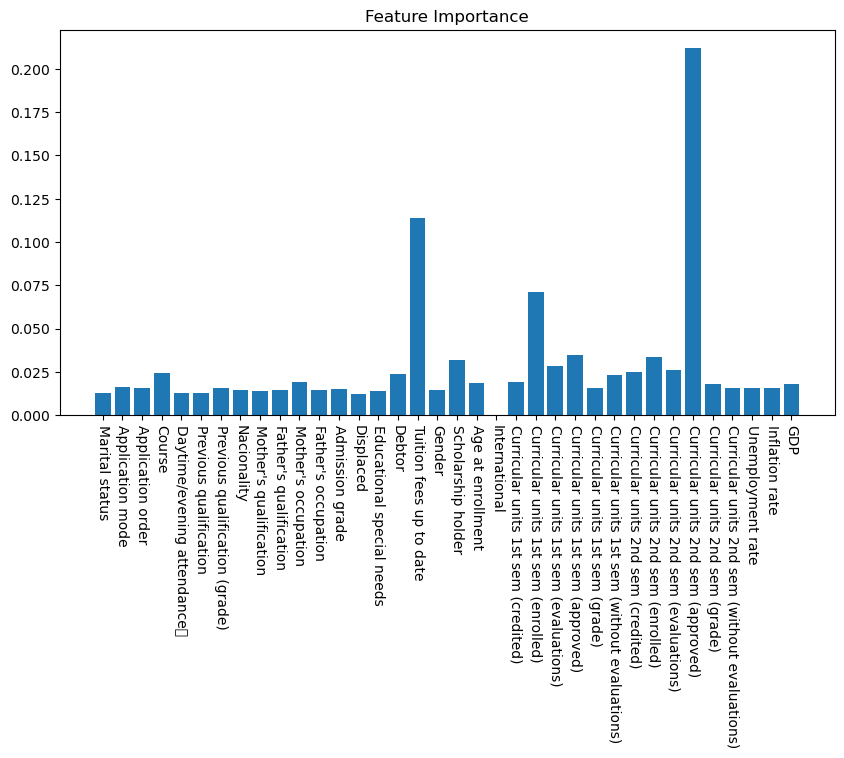

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(df.drop(['Target', 'Agglomerative Clustering', 'KMeans Clustering'], axis=1).columns, xgb_classifier.feature_importances_)
plt.xticks(rotation=270)
plt.title('Feature Importance')
plt.show()

XGBoost tends to outperform decision trees in terms of accuracy scores. As an ensemble model that combines multiple decision trees, XGBoost excels in handling complex feature dependencies and interactions, reducing overfitting, and optimizing training processes through advanced regularization techniques and parameter tuning. This makes XGBoost more robust and reliable, especially in scenarios with complex data characteristics or a large number of interdependent features. While decision trees may be prone to overfitting, XGBoost provides a more effective solution, resuting in higer accuracy score in classification or regression tasks. therefore, the preference for XGBoost over standalone decision trees is often justified by it's superior performance.